## Tesla vs Bitcoin

#### Importing Dependencies

In [12]:
import tradingeconomics as te
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import plotly.graph_objects as go
import matplotlib.patches as mpatches

#### API login


In [13]:
te.login("jupyter:jupyter") # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

#### Importing and Treating Data

In [14]:
symbols = ['btcusd:cur','tsla:us']
startDate = '2021-01-01'
#endDate = str((datetime.now() + timedelta(days=1)).date())
endDate = '2021-10-31'

In [15]:
stocksdf = te.fetchMarkets(symbol= symbols, initDate=startDate, endDate = endDate , output_type='df')[['symbol','close']] 
btc = stocksdf[stocksdf['symbol']=='BTCUSD:CUR'].rename(columns={'close':'bitcoin'}, inplace=False)
btc = btc['bitcoin'].apply(lambda x: x/10000)
tesla = stocksdf[stocksdf['symbol']=='TSLA:US'].rename(columns={'close':'tesla'}, inplace=False)

tesla = tesla['tesla'].apply(lambda x: x/100)
df = pd.merge(btc, tesla, left_index=True, right_index=True)
#df = df.drop(['symbol'], axis=1)

incomedf = te.getHistoricalFinancials('tsla:us','net-income', 'df')[['date','value']] 
incomedf['date'] = pd.DatetimeIndex(incomedf['date'])
incomedf.set_index('date', inplace=True)

incomedf = incomedf.loc[startDate:endDate]
incomedf['value'] = incomedf['value'].apply(lambda x: x/1000)


#Creating a dataframe with the announces
data = [
    {'startDate': datetime.strptime("2021-02-01", '%Y-%m-%d'), 
     'announce': 'Tesla announced a $1.5 billion investment in Bitcoin and allowed customers using cryptocurrency to buy Tesla cars'},
    {'startDate': datetime.strptime("2021-04-27", '%Y-%m-%d'),
     'announce': 'Tesla sold ~46k BTC in Q2 (Speculation)'},
    {'startDate': datetime.strptime("2021-05-12", '%Y-%m-%d'), 
     'announce': 'Tesla stopped to allowing customers buying cars with Bitcoin due to environmental concerns'},
    {'startDate': datetime.strptime("2021-06-13", '%Y-%m-%d'),
     'announce': 'Tesla is accepting bitcoin again'},
]  
 
announcesdf = pd.DataFrame(data) 
announcesdf

,startDate,announce
0,2021-02-01,Tesla announced a $1.5 billion investment in B...
1,2021-04-27,Tesla sold ~46k BTC in Q2 (Speculation)
2,2021-05-12,Tesla stopped to allowing customers buying car...
3,2021-06-13,Tesla is accepting bitcoin again


#### Plotting 

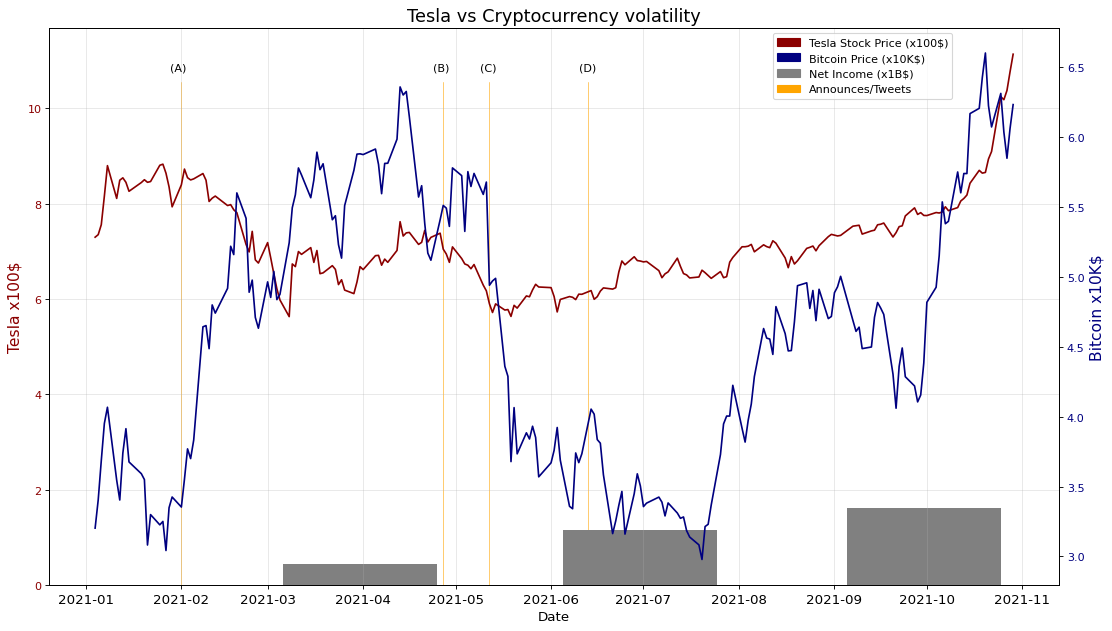

In [16]:
def plot(whatToShow):
    fig = go.Figure()
    labels = df.index.tolist()
    line2 = df['bitcoin'].values.tolist()
    line1 = df['tesla'].values.tolist()
    fig, ax1 = plt.subplots(1,1,figsize=(14,8), dpi= 80)
    if (whatToShow == 'announces'):
            for index, row in announcesdf.iterrows():
                plt.plot([row['startDate'],row['startDate']],[0,10.55], lw=0.5, color ='orange',zorder=-2)       
    bars = ax1.bar(x=incomedf.index.tolist(), height=incomedf['value'], width=50, label='Tesla Net Income', color=['grey'])
    ax1.plot(labels, line1, color='darkred')
    ax2 = ax1.twinx() 
    ax2.plot(labels, line2, color='navy')
    ax1.set_xlabel('Date', fontsize=12)
    ax1.tick_params(axis='x', rotation=0, labelsize=12)
    ax1.set_ylabel('Tesla x100$', color='darkred', fontsize=14)
    ax1.tick_params(axis='y', rotation=0, labelcolor='darkred' )
    ax1.grid(alpha=.3)
    ax2.set_ylabel("Bitcoin x10K$", color='navy', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='navy')
    ax2.set_title("Tesla vs Cryptocurrency volatility", fontsize=16)
   
    #Custom Legend
    patches = mpatches.Patch(color='darkred', label='Tesla Stock Price (x100$)')
    patches1 = mpatches.Patch(color='navy', label='Bitcoin Price (x10K$)')
    patches2 = mpatches.Patch(color='grey', label='Net Income (x1B$)')
    patches3 = mpatches.Patch(color='orange', label='Announces/Tweets')
    
    plt.legend(handles=[patches,patches1,patches2,patches3],loc='upper right', bbox_to_anchor=(0.9, 1))
    
    ax1.annotate('(A)',
                xy=(170, 560), xycoords='figure pixels')
    ax1.annotate('(B)',
                xy=(433, 560), xycoords='figure pixels')
    ax1.annotate('(C)',
                xy=(480, 560), xycoords='figure pixels')
    ax1.annotate('(D)',
                xy=(579, 560), xycoords='figure pixels')
    
    #ax1.legend()
    fig.tight_layout()

plot('announces')
plt.show()

##### Important notes:
- **(A)** **2021-02-01**: Tesla announced a $1.5 billion investment in Bitcoin and allowed customers using cryptocurrency to buy Tesla cars
- **(B)** **2021-04-27**: First announce by ellon Musk verifying that Tesla sold ~46k BTC in Q2
- **(C)** **2021-05-12**: Tesla stopped to allowing customers buying cars with Bitcoin due to environmental concerns
- Between May and June Ellon Musk did several tweets against Bitcoin causing some drops on bitcoin price.
- **(D)** **2021-06-13**: Tesla is accepting bitcoin again

In [ ]:
# fabio.guerreiro@tradingeconomics.com 